Setting Fuzzy

In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.1 MB/s eta 0:00:00


Example Case 1 (From The Lecturer)

i.e. we want to develop a system for water sprinkler. The inputs are: temperature (in ºC) and soil humidity (in %).

The desired output is the duration of watering (in minutes).

Suppose the crisp value received by the sensor is:
temperature = 37 ºC
humidity = 12%
How long is the duration needed?

Waktu penyiraman yang disarankan: 43.95312499999998 menit


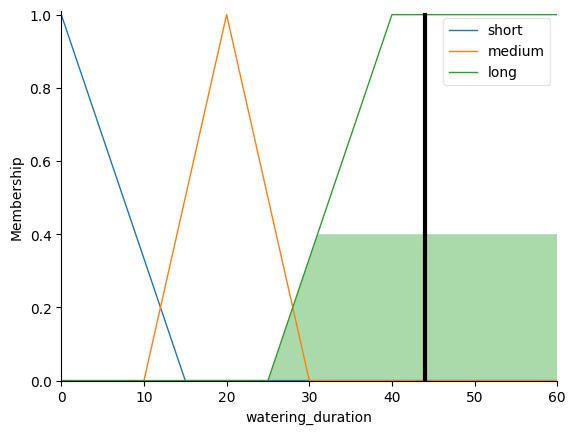

In [ ]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# New Antecedents/Consequents
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
soil_humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_humidity')
watering_duration = ctrl.Consequent(np.arange(0, 61, 1), 'watering_duration')

# Membership Functions for Temperature
temperature['cold'] = fuzz.trapmf(temperature.universe, [0, 0, 15, 25])
temperature['warm'] = fuzz.trimf(temperature.universe, [20, 30, 40])
temperature['hot'] = fuzz.trapmf(temperature.universe, [35, 40, 50, 50])

# Membership Functions for Soil Humidity
soil_humidity['dry'] = fuzz.trapmf(soil_humidity.universe, [0, 0, 10, 20])
soil_humidity['moist'] = fuzz.trimf(soil_humidity.universe, [15, 30, 45])
soil_humidity['wet'] = fuzz.trapmf(soil_humidity.universe, [40, 50, 100, 100])

# Membership FUnctions for Watering Duration
watering_duration['short'] = fuzz.trimf(watering_duration.universe, [0, 0, 15])
watering_duration['medium'] = fuzz.trimf(watering_duration.universe, [10, 20, 30])
watering_duration['long'] = fuzz.trapmf(watering_duration.universe, [25, 40, 60, 60])

# Rules
rule1 = ctrl.Rule(temperature['cold'] & soil_humidity['dry'], watering_duration['medium'])
rule2 = ctrl.Rule(temperature['cold'] & soil_humidity['moist'], watering_duration['short'])
rule3 = ctrl.Rule(temperature['cold'] & soil_humidity['wet'], watering_duration['short'])
rule4 = ctrl.Rule(temperature['warm'] & soil_humidity['dry'], watering_duration['long'])
rule5 = ctrl.Rule(temperature['warm'] & soil_humidity['moist'], watering_duration['medium'])
rule6 = ctrl.Rule(temperature['warm'] & soil_humidity['wet'], watering_duration['short'])
rule7 = ctrl.Rule(temperature['hot'] & soil_humidity['dry'], watering_duration['long'])
rule8 = ctrl.Rule(temperature['hot'] & soil_humidity['moist'], watering_duration['medium'])
rule9 = ctrl.Rule(temperature['hot'] & soil_humidity['wet'], watering_duration['short'])

# Control System Simulation
watering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
watering_sim = ctrl.ControlSystemSimulation(watering_ctrl)

#Inputs
watering_sim.input['temperature'] = 37
watering_sim.input['soil_humidity'] = 12

#Crunch The Numbers
watering_sim.compute()

#Outputs
print(f"Waktu penyiraman yang disarankan: {watering_sim.output['watering_duration']} menit")
watering_duration.view(sim=watering_sim)
plt.show()

Example Case 2

A 52-year-old man wanted to ride a Roller Coaster at a game ride; When he was about to ride, an officer stopped him because there was a rule that "Parents and Children are not allowed to ride the Roller Coaster" But the man did not accept it, because he felt that he could not be called old, he preferred to call himself an adult man. And adult is different from old.

finish using fuzzy

Prosentase diijinkan naik roller coster adalah: 83.18181818181823%


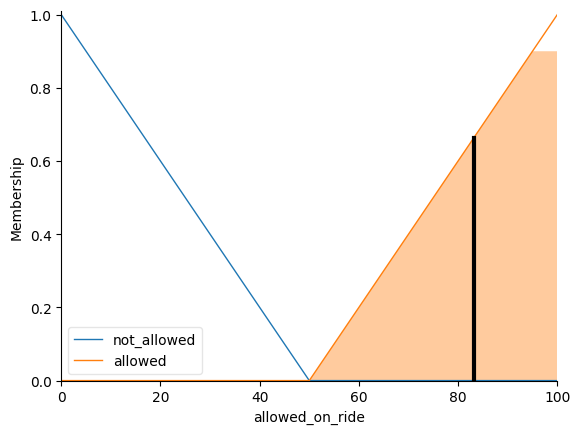

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedents/Consequents
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
maturity_level = ctrl.Consequent(np.arange(0, 101, 1), 'maturity_level')
allowed_on_ride = ctrl.Consequent(np.arange(0, 101, 1), 'allowed_on_ride')

# Membership Functions for Age
age['young'] = fuzz.trimf(age.universe, [0, 0, 20])
age['adult'] = fuzz.trapmf(age.universe, [15, 30, 50, 70])
age['senior'] = fuzz.trapmf(age.universe, [60, 70, 100, 100])

# Membership Functions for Maturity Level
maturity_level['low'] = fuzz.trimf(maturity_level.universe, [0, 0, 50])
maturity_level['medium'] = fuzz.trimf(maturity_level.universe, [40, 50, 60])
maturity_level['high'] = fuzz.trimf(maturity_level.universe, [50, 100, 100])

# Membership Functions for Allowed on Ride
allowed_on_ride['not_allowed'] = fuzz.trimf(allowed_on_ride.universe, [0, 0, 50])
allowed_on_ride['allowed'] = fuzz.trimf(allowed_on_ride.universe, [50, 100, 100])

# Rules
rule1 = ctrl.Rule(age['young'], maturity_level['low'])
rule2 = ctrl.Rule(age['adult'], maturity_level['high'])
rule3 = ctrl.Rule(age['senior'], maturity_level['medium'])

rule4 = ctrl.Rule(maturity_level['low'] | maturity_level['medium'], allowed_on_ride['not_allowed'])
rule5 = ctrl.Rule(maturity_level['high'], allowed_on_ride['allowed'])

# Control System Simulation
maturity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
maturity_sim = ctrl.ControlSystemSimulation(maturity_ctrl)

#Input
maturity_sim.input['age'] = 52

#Crunch The Numbers
maturity_sim.compute()

#Output
print(f"Prosentase diijinkan naik roller coster adalah: {maturity_sim.output['allowed_on_ride']}%")
allowed_on_ride.view(sim=maturity_sim)
plt.show()

# Tugas
Buatlah 1 studi kasus dan deskripsikan studi kasus anda selanjutnya selesaikan menggunakan python
# Jawab

Berikut contoh studi kasus dari saya.

Sebuah pusat kebugaran (gym) ingin memberikan rekomendasi intensitas olahraga untuk diterapkan oleh seorang pendaftar baru berusia 45 tahun dengan perkiraan tingkat kebugaran tubuhnya mencapai 60%. Mereka biasa menggunakan tolak ukur berupa usia dan perkiraan tingkat kebugaran tubuh anggota untuk memberikan rekomendasi olahraga terapan yang dapat dilakukan.

## Analisis dan Pemetaan Awal

Input: Usia (age, scaled on years), Tingkat Kebugaran (fitness_level, scaled on 100% point; low, high, medium)

Output:
Reccomended Training Intensity (low, medium, high)

## Perkiraan Rules
1. Usia masih muda (young) dan tingkat kebugarannya tinggi (high) maka direkomendasikan untuk intensitas olahraganya tinggi (high)
2. Usia masih muda dan tingkat kebugarannya sedang (medium) maka direkomendasikan untuk intensitas olahraganya sedang (medium)
3. Usia masih muda (young) dan tingkat kebugarannya rendah (low) maka direkomendasikan untuk intensitas olahraganya sedang (medium)
4. Usia sudah masuk menengah (senior) dan tingkat kebugarannya tinggi (high) maka direkomendasikan untuk intensitas olahraganya tinggi (high)
5. Usia sudah masuk menengah (senior) dan tingkat kebugarannya sedang (medium) maka direkomendasikan untuk intensitas olahraganya sedang (medium)
6. Usia sudah masuk menengah (senior) dan tingkat kebugarannya rendah (low) maka direkomendasikan untuk intensitas olahraganya rendah (low)
7. Usia sudah tua (old) namun tingkat kebugarannya masih tinggi (high) maka direkomendasikan untuk intensitas olahraganya sedang (medium)
8. Usia sudah tua (old) namun tingkat kebugarannya masih lumayan (medium) maka direkomendasikan untuk intensitas olahraganya ringan saja (low)
9. Usia sudah tua (old) dan tingkat kebugarannya sudah rendah (low) maka direkomendasikan untuk intensitas olahraganya rendah (low)

## Perkiraan Skala Untuk Tiap Kategori
### Age

Young: 20-35

Senior:30-50

Old: 50-65

### Fitness Level

Low: 0-40%

Medium: 40-65%

High: 65-100%

### Training Intensity

Low: 0-35%

Medium: 35-65%

High: 65-100%

--------------------------------------------
--------------------------------------------
## Implementasi Kode

Intensitas olahraga yang disarankan adalah: 49.22222222222224%


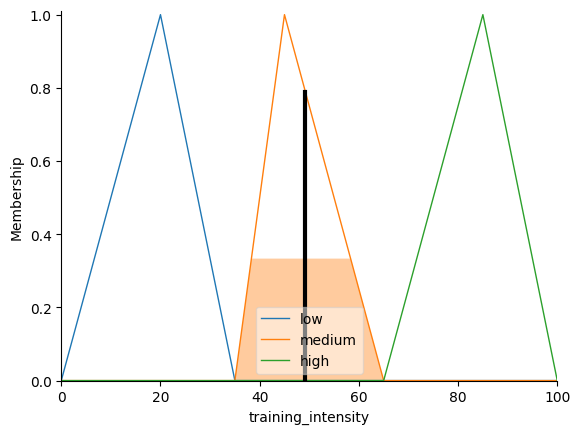

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Atecedents/Consequents
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
fitness_lvl = ctrl.Antecedent(np.arange(0, 101, 1), 'fitness_lvl')
training_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'training_intensity')

# Membership Functions for Age
age['young'] = fuzz.trapmf(age.universe, [20, 25, 30, 35])
age['senior'] = fuzz.trapmf(age.universe, [35, 38, 45, 50])
age['old'] = fuzz.trapmf(age.universe, [50, 55, 60, 65])

# Membership Functions for Fitness Level
fitness_lvl['low'] = fuzz.trimf(fitness_lvl.universe, [0, 20, 40])
fitness_lvl['medium'] = fuzz.trimf(fitness_lvl.universe, [40, 50, 65])
fitness_lvl['high'] = fuzz.trimf(fitness_lvl.universe, [65, 80, 100])

# Membership Functions for Training Intensity
training_intensity['low'] = fuzz.trimf(training_intensity.universe, [0, 20, 35])
training_intensity['medium'] = fuzz.trimf(training_intensity.universe, [35, 45, 65])
training_intensity['high'] = fuzz.trimf(training_intensity.universe, [65, 85, 100])

# Rules
rule1 = ctrl.Rule(age['young'] & fitness_lvl['low'], training_intensity['medium'])
rule2 = ctrl.Rule(age['young'] & fitness_lvl['medium'], training_intensity['medium'])
rule3 = ctrl.Rule(age['young'] & fitness_lvl['high'], training_intensity['high'])
rule4 = ctrl.Rule(age['senior'] & fitness_lvl['low'], training_intensity['low'])
rule5 = ctrl.Rule(age['senior'] & fitness_lvl['medium'], training_intensity['medium'])
rule6 = ctrl.Rule(age['senior'] & fitness_lvl['high'], training_intensity['high'])
rule7 = ctrl.Rule(age['old'] & fitness_lvl['low'], training_intensity['low'])
rule8 = ctrl.Rule(age['old'] & fitness_lvl['medium'], training_intensity['low'])
rule9 = ctrl.Rule(age['old'] & fitness_lvl['high'], training_intensity['medium'])

# Control System Simulation
training_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
training_sim = ctrl.ControlSystemSimulation(training_ctrl)

#Inputs

training_sim.input['age'] = 45
training_sim.input['fitness_lvl'] = 60

#Crunch The Numbers
training_sim.compute()

#Output
print(f"Intensitas olahraga yang disarankan adalah: {training_sim.output['training_intensity']}%")
training_intensity.view(sim=training_sim)
plt.show()